## ĐỒ ÁN LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU - THỰC HÀNH

### Thành viên:
- 20120634: Lê Minh Trí
- 20120633: Viên Hải Yến
- 20120219: Nguyễn Minh Trí
- 20120357: Nguyễn Đức Minh Quân


## **Mô tả đồ án:**
- Thực hiện quy trình khoa học dữ liệu với dữ liệu được chọn, cụ thể ở đây là danh sách các bộ phim trên Nexfilx được lấy về vào năm 2021, những bộ phim được Nexflix phát hành tình từ ngày 14/4/2015.
- Tự đặt các câu hỏi liên quan tới dữ liệu và có thể đào sâu được các vấn đề tiềm ẩn, từ đó trực quan hóa sinh động dữ liệu và tìm ra những điểm mấu chốt có thể áp dụng được trong mô hình dữ liệu.

### **Thời gian kết thúc đồ án:** 11/12/2022
### **Thời gian vấn đáp:** 11/12/2022
### **Nguồn của dữ liệu:**
##### Dữ liệu được lấy trên Kaggle dưới file exel, đường link dẫn đến  [Ở đây](https://www.kaggle.com/datasets/syedmubarak/netflix-dataset-latest-2021)

## Cách thức chạy

Nhấn vào ***Run all*** để chạy

import thư viện

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Thu thập dữ liệu

- Dữ liệu mà nhóm sinh viên là về chủ đề gì và được lấy từ nguồn nào?
- Người ta có cho phép sử dụng dữ liệu như thế này hay không? Ví dụ: cần kiểm
tra thử License của dữ liệu là gì?
- Người ta đã thu thập dữ liệu này như thế nào?

## Khám phá dữ liệu

### Đọc dữ liệu

In [25]:
df=pd.read_excel('./dataset/Netflix Dataset Latest 2021.xlsx')
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


#### Dữ liệu bao nhiêu dòng bao nhiêu cột

In [26]:
num_rows,num_cols=df.shape
print('Số cột : {}'.format(num_cols))
print('Số dòng: {}'.format(num_rows))

Số cột : 29
Số dòng: 9425


#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Your text here

#### Dữ liệu có các dòng bị lặp không?

In [27]:
have_duplicated_rows=df.duplicated().any()

if have_duplicated_rows:
    print('Các dòng dữ liệu bị lặp')
else:
    print('Các dòng dữ liệu không bị lặp')

Các dòng dữ liệu không bị lặp


#### Dữ liệu có bị thiếu không ?

In [28]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio[missing_ratio > 0]

Genre                    0.002653
Tags                     0.003820
Languages                0.016870
Hidden Gem Score         0.001061
Country Availability     0.001167
Runtime                  0.000106
Director                 0.244562
Writer                   0.192042
Actors                   0.011777
View Rating              0.275650
IMDb Score               0.000849
Rotten Tomatoes Score    0.422281
Metacritic Score         0.566897
Awards Received          0.445517
Awards Nominated For     0.323501
Boxoffice                0.601698
Release Date             0.022069
Production House         0.533899
IMDb Link                0.034377
Summary                  0.000531
IMDb Votes               0.001061
Poster                   0.099523
Trailer Site             0.000106
dtype: float64

#### Mỗi cột có ý nghĩa gì?

| Index   |      Name     |  Meaning |
|---------|:--------------|:---------|
| 1       | Title         |Tên bộ phim|
| 2       | Genre         |Thể loại |
| 3       | Tags          |Các nhãn liên quan tới bộ phim (thường dùng để miêu tả thể loại, giúp người dùng tìm được những phim phim liên qua)|
| 3       | Languages|Ngôn ngữ được sử dụng trong bộ phim |
| 3       | Series or Movie          |Là phim dài tập hay phim chỉ 1 tập (chiếu rạp) |
| 3       | Hidden Gem Score          |Đánh giá độ tìm năng của phim|
| 3       | Country Availability          |Quốc gia sẵn có phim|
| 3       | Runtime          |Thời gian chiếu của phim (với những series thì là thời gian chiếu của từng tập phim)|
| 3       | Director          |Đạo diễn|
| 3       | Writer          |Biên kịch|
| 3       | Actors          |Diễn viên|
| 3       | View Rating          |Xếp loại về nội dung mà từ đó quyết định có phù hợp với người xem hay không<br>- G: tất cả mọi người<br>- PG (Parental Guidance Suggested): đề nghị có sự giám sát của cha mẹ vì chứa một vài yếu tố không phù hợp<br>- PG-13 : Đặc biệt lưu ý, không phù hợp với người dưới 13 tuổi<br>- R (Restricted): người dưới 17 tuổi yêu cầu có cha mẹ hoặc người giám hộ đi cùng<br>- NC-17: Không cho phép người 17 tuổi và dưới 17 tuổi |
| 3       | IMDb Score          |Điểm số được tính trên IMDb |
| 3       | Rotten Tomatoes Score          |Điểm được đánh giá trên website  Rotten Tomatoes (thang điểm 10)<br> Đây là trang chuyên đánh giá các bộ phim |
| 3       | Metacritic Score          |Điểm được đánh giá trên Metacritic (thang điểm 100) <br>Metacritic là một trang mạng tổng hợp các bài đánh giá album nhạc, trò chơi điện tử, phim điện ảnh, chương trình truyền hình và đĩa DVD. |
| 3       | Awards Received          |Số giải thưởng nhận được|
| 3       | Awards Nominated For          |Số giải thưởng được đề cử|
| 3       | Boxoffice          |Doanh thu phòng vé|
| 3       | Release Date          |Ngày phát hành|
| 3       | Netflix Release Date          |Ngày phát hành trên Nexflix |
| 3       | Production House          |Nhà sản xuất|
| 3       | Netflix Link          |Đường dẫn tới film trên Nexflix|
| 3       | IMDb Link          |Đường dẫn tới film trên IMDb |
| 3       | Summary          |Tóm tắt nội dung|
| 3       | IMDb Votes          |Số lượng bình chọn trên IMDb|
| 3       | Image          |Hình ảnh của bộ phim|
| 3       | Poster          |Poster của phim|
| 3       | TMDb Trailer          |Trailer film|
| 3       | Trailer Site         |Tên của trang web chứa trailer|

#### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [29]:
df.dtypes

Title                            object
Genre                            object
Tags                             object
Languages                        object
Series or Movie                  object
Hidden Gem Score                float64
Country Availability             object
Runtime                          object
Director                         object
Writer                           object
Actors                           object
View Rating                      object
IMDb Score                      float64
Rotten Tomatoes Score           float64
Metacritic Score                float64
Awards Received                 float64
Awards Nominated For            float64
Boxoffice                       float64
Release Date             datetime64[ns]
Netflix Release Date     datetime64[ns]
Production House                 object
Netflix Link                     object
IMDb Link                        object
Summary                          object
IMDb Votes                      float64


 #### Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

2 cột thời gian hiển thị khác nhau ?

### Tiền xử lí dữ liệu

Liệt kê các vấn đề gặp phải để tiền xử lí

*Vấn đề 1* : Cột "Runtime" đang ở dạng chuỗi cần được chuyển sang dạng tuple để dễ phân biệt được thời lượng phim

In [30]:
transform_dict={'< 30 minutes':(0,0.5),
                '1-2 hour':(1,2),
                '> 2 hrs':(2,np.nan),
                '30-60 mins':(0.5,1)}
# df['Runtime']=df['Runtime'].transform(lambda x: transform_dict[x] if x is not np.nan else x)
df1=df['Runtime'].transform(lambda x: transform_dict[x] if x in transform_dict.keys() else (np.nan,np.nan))
df1.unique()

array([(0, 0.5), (1, 2), (2, nan), (0.5, 1), (nan, nan)], dtype=object)

*Vấn đề 2 :* Không cần thiết cột Trailer site ?

*Vấn đề 3 :* Đưa cột Boxoffic về dạng số, vì tất cả đơn vị đều đã là '$', làm vậy sẽ giảm kích thước lưu trữ của dữ liệu

*Vấn đề 4 :* Đưa cột Release Date và Nexflix Release Date về cùng định dạng

*Vấn đề 5*: Các cột "Genre", "Tags", "Languages", "Country Availability", "Writer", "Actors", "Production House" đang ở dạng chuỗi, nên được đưa sang dạng list để thể hiện danh sách rõ hơn

In [31]:
columns=["Genre","Tags","Languages","Country Availability","Writer","Actors","Production House"]
for col in columns:
    df[col]=df[col].transform(lambda x: x.split(', ') if x is not np.nan else x)

### Khám phá sau khi tiền xử lí

#### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

#### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào? 

## Trả lời câu hỏi (Tự đặt và trả lời)

**Câu hỏi 1:** Phân tích về điểm số IMDb của thể loại phim chiếu rạp và series

**Câu hỏi 2:** Liệu thời gian chiếu của phim có ảnh hướng tới lượt xem của phim không ?

**Câu hỏi 3:** Thể loại phim nào đang phổ biến trên Netflix

In [32]:
df1=df[['Genre']].copy().dropna()
df1=df1.Genre.apply(pd.Series).merge(df1,right_index=True,left_index=True)
df1=df1.melt(id_vars=['Genre'],value_name="Genre_Split")
df1=df1.drop(["variable","Genre"],axis=1).dropna()
df1['Count']=np.ones(len(df1))
df1=df1.groupby(['Genre_Split'])['Count'].sum().to_frame().reset_index(names="Genre_Split")
df1=df1.sort_values(by=["Count"],ascending=False,ignore_index=True)
df1

,Genre_Split,Count
0,Drama,4803.0
1,Comedy,3305.0
2,Action,2149.0
3,Thriller,2071.0
4,Romance,1812.0
5,Crime,1512.0
6,Adventure,1355.0
7,Fantasy,1228.0
8,Animation,1173.0
9,Sci-Fi,955.0


In [33]:
show_amount=7

other=["Other",df1["Count"][show_amount:].sum()]
df1=df1.drop(np.arange(show_amount,len(df1)))
df1.loc[len(df1)]=other

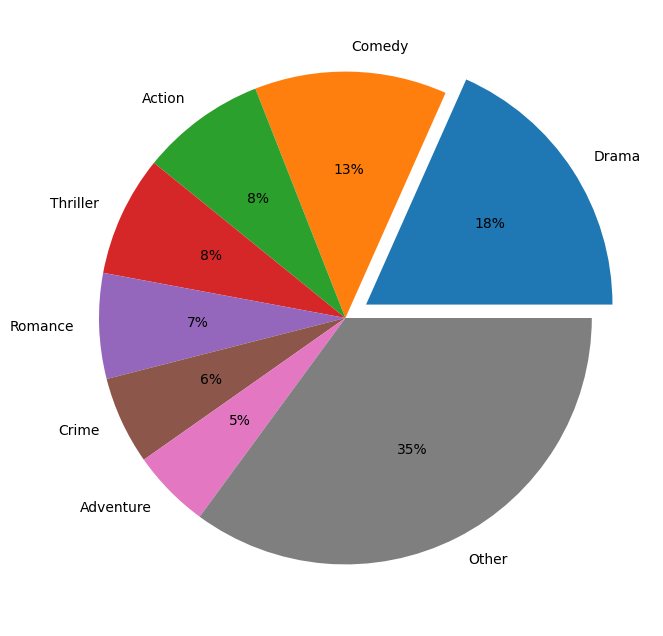

In [34]:
plt.subplots(figsize=(18,8))
plt.pie(df1['Count'], 
        labels = df1['Genre_Split'],
        autopct='%.0f%%',
        explode=np.concatenate((np.array([0.1]),np.zeros(len(df1)-1)))
        )
plt.show()

**Câu hỏi 5:** Các quốc gia dẫn đầu trong việc sản xuất phim và thể loại họ sản xuất là gì ?

**Câu hỏi 6:** Có giải thưởng nào lượt thấp nhưng vẫn đạt giải hay không ?

**Câu hỏi 7:** Việc giới hạn độ tuổi phim có ảnh hưởng đến lượt xem và các giải thưởng đạt được hay không ?

**Câu hỏi 8:** Điểm tên một số diễn viên thường góp mặt trong những bộ phim có rating khủng

**Câu hỏi 9:** Nội dung nếu muốn được đăng lên thì thường được các nhà làm phim phát hành vào thời điểm nào của năm

**Câu hỏi 10:** Số lượng phim phân bố ở các năm. Tăng hay giảm ?

**Câu hỏi 11:** Số lượng phim phát hành vào các tháng qua thời gian? Nếu muốn phát hành 1 nội dung thì nên chọn tháng nào để ít cạnh tranh?

In [35]:
df1=df[['Title','Release Date']].copy()
df1.dropna(inplace=True)
df1['Month']=df1['Release Date'].transform(lambda x: x.month)
df1['Year']=df1['Release Date'].transform(lambda x: x.year)
df1=df1[df1['Year'] >= 2008]
# df1.sort_values(by=['Month'],inplace=True)
df1['Month']=df1['Release Date'].transform(lambda x: x.month_name())
df1=df1.groupby(['Year','Month'])['Title'].count().unstack(level=0)
df1=df1.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
df1=df1.fillna(0)
df1

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,,
January,17.0,21.0,30.0,35.0,38.0,28.0,44.0,42.0,63.0,73.0,68.0,64.0,55.0,27.0
February,20.0,18.0,15.0,18.0,24.0,32.0,30.0,35.0,53.0,63.0,64.0,61.0,47.0,13.0
March,17.0,11.0,26.0,26.0,28.0,39.0,32.0,34.0,45.0,72.0,86.0,87.0,46.0,2.0
April,12.0,24.0,24.0,35.0,37.0,29.0,39.0,45.0,63.0,87.0,83.0,85.0,54.0,0.0
May,11.0,13.0,19.0,17.0,26.0,29.0,38.0,44.0,42.0,57.0,68.0,83.0,42.0,0.0
June,19.0,14.0,17.0,20.0,23.0,31.0,17.0,38.0,44.0,75.0,75.0,67.0,27.0,0.0
July,16.0,15.0,21.0,31.0,22.0,36.0,41.0,51.0,56.0,65.0,64.0,62.0,46.0,0.0
August,13.0,17.0,26.0,27.0,30.0,35.0,38.0,57.0,57.0,78.0,89.0,61.0,31.0,0.0
September,28.0,24.0,24.0,38.0,35.0,40.0,50.0,58.0,74.0,86.0,101.0,64.0,41.0,0.0


Text(195.72222222222223, 0.5, 'Month')

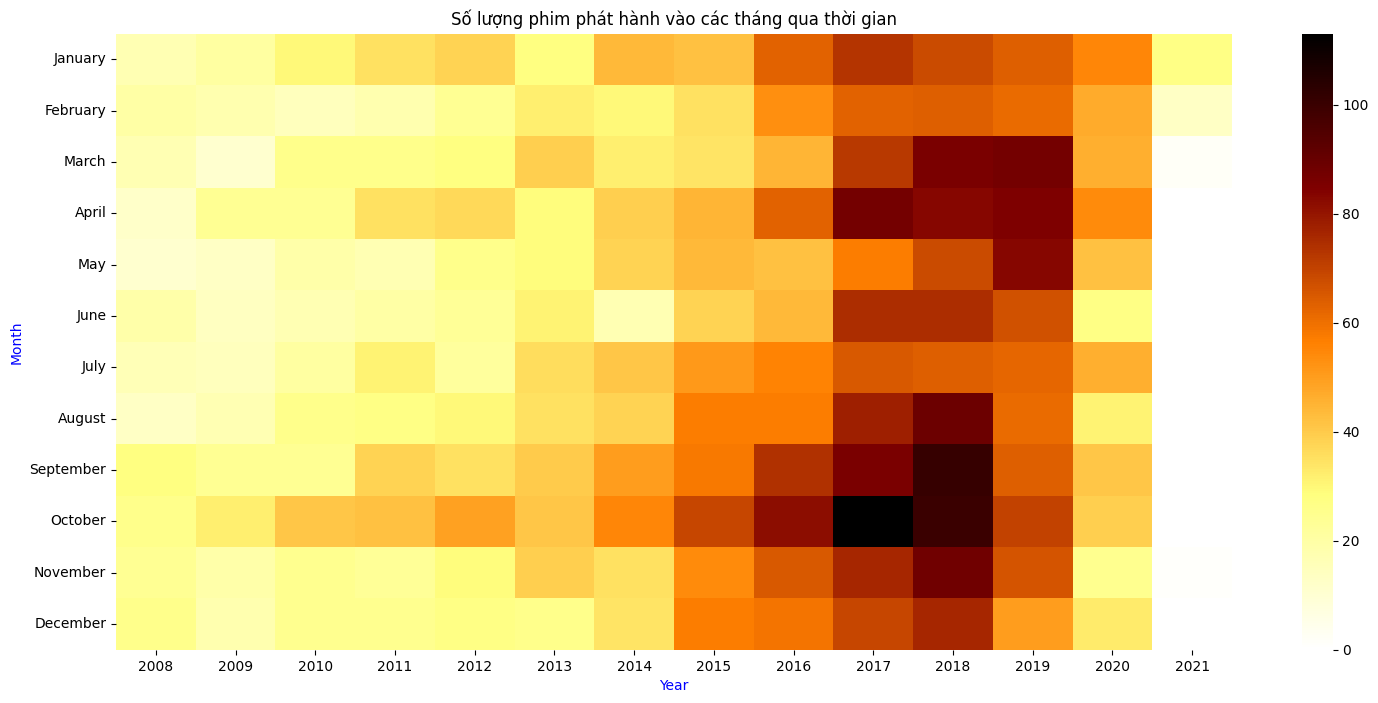

In [36]:
plt.subplots(figsize=(18,8))
sns.heatmap(data=df1,
            cmap='afmhot_r')
plt.title('Số lượng phim phát hành vào các tháng qua thời gian')
plt.xlabel('Year',color="blue")
plt.ylabel('Month',color="blue")

Tháng 2 và Tháng 7 thường có số lượng phim phát hành tương đối ít hơn so với các tháng khác trong năm. Hai tháng này là thời điểm hợp lý để phát hành 1 nội dung trên Netflix